In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import the packages

In [2]:
table=pd.read_excel("unemployment_rate.xlsx")
table
# making data frame from csv file


,Year,Month,Primary_School,Date,High_School,Associates_Degree,Professional_Degree,White,Black,Asian,Hispanic,Men,Women
0,2010.0,jan,15.3,Jan-2010,10.2,8.6,4.9,8.8,16.5,8.3,12.9,10.2,7.9
1,2011.0,Jan,14.3,Jan-2011,9.5,8.1,4.3,8.1,NaN,6.8,12.3,9.0,7.9
2,999999.0,Jan,999999.0,Jan-2012,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0
3,2013.0,Jan,12.0,Jan-2013,8.1,NaN,3.8,7.1,13.7,6.4,NaN,7.5,7.2
4,2014.0,Jan,9.4,Jan-2014,6.5,5.9,3.3,5.7,12.1,4.7,8.3,6.2,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2016.0,Dec,7.5,Dec-2016,5.1,3.8,2.5,4.2,7.9,2.7,5.9,4.4,NaN
128,2017.0,Dec,6.2,Dec-2017,4.2,3.6,2.2,3.7,6.7,2.5,5.0,3.7,3.7
129,2018.0,NaN,5.8,Dec-2018,NaN,NaN,NaN,3.4,6.6,3.3,4.4,3.6,3.5
130,2019.0,Dec,5.2,Dec-2019,3.7,2.7,1.9,3.2,5.9,2.5,4.2,3.1,3.2


In [3]:
table.info()
# displaying data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 127 non-null    float64
 1   Month                122 non-null    object 
 2   Primary_School       111 non-null    float64
 3   Date                 122 non-null    object 
 4   High_School          111 non-null    float64
 5   Associates_Degree    113 non-null    float64
 6   Professional_Degree  112 non-null    float64
 7   White                115 non-null    float64
 8   Black                109 non-null    float64
 9   Asian                109 non-null    float64
 10  Hispanic             115 non-null    float64
 11  Men                  110 non-null    float64
 12  Women                109 non-null    float64
dtypes: float64(11), object(2)
memory usage: 13.5+ KB


In [4]:
table.describe()
#to see descriptive statistics

,Year,Primary_School,High_School,Associates_Degree,Professional_Degree,White,Black,Asian,Hispanic,Men,Women
count,127.000000,111.000000,111.000000,113.000000,112.000000,115.000000,109.000000,109.000000,115.000000,110.000000,109.000000
mean,119887.314961,135142.981982,135140.481081,132747.763717,133931.096429,130439.359130,137623.577982,137618.498165,130441.163478,136368.405455,137619.178899
std,323363.497247,343414.771350,343415.764394,340806.390521,342104.847725,338252.876521,346082.344715,346084.383298,338252.174647,344742.589555,346084.110111
min,2010.000000,5.200000,3.400000,2.700000,1.900000,3.100000,5.400000,2.100000,4.100000,3.100000,3.100000
25%,2013.000000,6.550000,4.850000,3.700000,2.400000,3.800000,7.500000,3.300000,5.200000,4.025000,4.000000
50%,2016.000000,9.200000,6.200000,5.300000,3.200000,5.300000,10.900000,4.700000,7.200000,5.700000,5.500000
75%,2019.000000,14.100000,9.550000,7.800000,4.300000,8.000000,15.600000,6.800000,11.200000,8.575000,7.900000
max,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000


In [5]:
table.duplicated().sum()
# counting duplicated values at columns

0

In [6]:
table.isnull().sum()
# counting null values at columns

Year                    5
Month                  10
Primary_School         21
Date                   10
High_School            21
Associates_Degree      19
Professional_Degree    20
White                  17
Black                  23
Asian                  23
Hispanic               17
Men                    22
Women                  23
dtype: int64

In [7]:
for i in table.select_dtypes(include="object").columns:
  print(table[i].value_counts())
  # to find the mistakes on typing 

Sep    11
Feb    11
Dec    10
Mar    10
Aug    10
Apr     9
May     9
Jun     9
Nov     8
OCt     8
Jan     7
Jul     7
jan     4
jul     3
Oct     3
jun     2
APR     1
Name: Month, dtype: int64
Jan-2010    1
Sep-2020    1
Sep-2018    1
Sep-2017    1
Sep-2016    1
           ..
Apr-2015    1
Apr-2014    1
Apr-2013    1
Apr-2012    1
Dec-2020    1
Name: Date, Length: 122, dtype: int64


In [8]:
table.columns=table.columns.str.title()
for i in table.select_dtypes(include="object").columns:
  print(table[i].value_counts())
    # to fix the titles

Sep    11
Feb    11
Dec    10
Mar    10
Aug    10
Apr     9
May     9
Jun     9
Nov     8
OCt     8
Jan     7
Jul     7
jan     4
jul     3
Oct     3
jun     2
APR     1
Name: Month, dtype: int64
Jan-2010    1
Sep-2020    1
Sep-2018    1
Sep-2017    1
Sep-2016    1
           ..
Apr-2015    1
Apr-2014    1
Apr-2013    1
Apr-2012    1
Dec-2020    1
Name: Date, Length: 122, dtype: int64


In [9]:
table["Month"]=table["Month"].str.title()
for i in table.select_dtypes(include="object").columns:
  print(table[i].value_counts())
  #printed them all in title type

Jan    11
Feb    11
Jun    11
Sep    11
Oct    11
Mar    10
Apr    10
Jul    10
Aug    10
Dec    10
May     9
Nov     8
Name: Month, dtype: int64
Jan-2010    1
Sep-2020    1
Sep-2018    1
Sep-2017    1
Sep-2016    1
           ..
Apr-2015    1
Apr-2014    1
Apr-2013    1
Apr-2012    1
Dec-2020    1
Name: Date, Length: 122, dtype: int64


In [10]:
table.isnull().sum()
  # to see the null data

Year                    5
Month                  10
Primary_School         21
Date                   10
High_School            21
Associates_Degree      19
Professional_Degree    20
White                  17
Black                  23
Asian                  23
Hispanic               17
Men                    22
Women                  23
dtype: int64

In [11]:
table["Year"].value_counts()
# to find irrelavent data in the year column

999999.0    15
2014.0      12
2015.0      12
2011.0      11
2017.0      11
2018.0      11
2020.0      11
2013.0      10
2019.0      10
2016.0       9
2012.0       8
2010.0       7
Name: Year, dtype: int64

In [12]:
table["Date"]=table["Date"].fillna(0,limit=1)# Filling the first null with a zero value and looking at the year and month values ​​to fill the date
print(table["Month"].loc[table["Date"]==0],table["Year"].loc[table["Date"]==0])# To find out the month and year of the date we will fill in
table["Date"].loc[table["Date"]==0]=table["Date"].loc[table["Date"]==0]="Feb"+"-"+"2019"# to replace the zero value with the date value we want
table["Date"]=table["Date"].fillna(1,limit=1)
print(table["Month"].loc[table["Date"]==1],table["Year"].loc[table["Date"]==1])
table["Date"].loc[table["Date"]==1]=table["Date"].loc[table["Date"]==1]="Apr"+"-"+"2011"
table["Date"]=table["Date"].fillna(2,limit=1)
print(table["Month"].loc[table["Date"]==2],table["Year"].loc[table["Date"]==2])
table["Date"].loc[table["Date"]==2]=table["Date"].loc[table["Date"]==2]="Jun"+"-"+"2011"
table["Date"]=table["Date"].fillna(3,limit=1)
print(table["Month"].loc[table["Date"]==3],table["Year"].loc[table["Date"]==3])
table["Date"].loc[table["Date"]==3]=table["Date"].loc[table["Date"]==3]="Jul"+"-"+"2011"
table["Date"]=table["Date"].fillna(4,limit=1)
print(table["Month"].loc[table["Date"]==4],table["Year"].loc[table["Date"]==4])
table["Date"].loc[table["Date"]==4]=table["Date"].loc[table["Date"]==4]="Jul"+"-"+"2018"
table["Date"]=table["Date"].fillna(5,limit=1)
print(table["Month"].loc[table["Date"]==5],table["Year"].loc[table["Date"]==5])
table["Date"].loc[table["Date"]==5]=table["Date"].loc[table["Date"]==5]="Aug"+"-"+"2012"
table["Date"]=table["Date"].fillna(6,limit=1)
print(table["Month"].loc[table["Date"]==6],table["Year"].loc[table["Date"]==6])
table["Date"].loc[table["Date"]==6]=table["Date"].loc[table["Date"]==6]="Sep"+"-"+"2013"
table["Date"]=table["Date"].fillna(7,limit=1)
print(table["Month"].loc[table["Date"]==7],table["Year"].loc[table["Date"]==7])
table["Date"].loc[table["Date"]==7]=table["Date"].loc[table["Date"]==7]="Oct"+"-"+"2017"
table["Date"]=table["Date"].fillna(8,limit=1)
print(table["Month"].loc[table["Date"]==8],table["Year"].loc[table["Date"]==8])
table["Date"].loc[table["Date"]==8]=table["Date"].loc[table["Date"]==8]="Nov"+"-"+"2010"
table["Date"]=table["Date"].fillna(9,limit=1)
print(table["Month"].loc[table["Date"]==9],table["Year"].loc[table["Date"]==9])
table["Date"].loc[table["Date"]==9]=table["Date"].loc[table["Date"]==9]="Nov"+"-"+"2018"
print(table["Date"].tail(55))
#print's are for to see the year and month of the row and changed by hand

20    Feb
Name: Month, dtype: object 20    2019.0
Name: Year, dtype: float64
34    Apr
Name: Month, dtype: object 34    2011.0
Name: Year, dtype: float64
56    Jun
Name: Month, dtype: object 56    2011.0
Name: Year, dtype: float64
67    Jul
Name: Month, dtype: object 67    2011.0
Name: Year, dtype: float64
74    NaN
Name: Month, dtype: object 74    2018.0
Name: Year, dtype: float64
79    NaN
Name: Month, dtype: object 79    999999.0
Name: Year, dtype: float64
91    Sep
Name: Month, dtype: object 91    2013.0
Name: Year, dtype: float64
106    Oct
Name: Month, dtype: object 106    2017.0
Name: Year, dtype: float64
110    Nov
Name: Month, dtype: object 110    999999.0
Name: Year, dtype: float64
118    Nov
Name: Month, dtype: object 118    2018.0
Name: Year, dtype: float64
77     Aug-2010
78     Aug-2011
79     Aug-2012
80     Aug-2013
81     Aug-2014
82     Aug-2015
83     Aug-2016
84     Aug-2017
85     Aug-2018
86     Aug-2019
87     Aug-2020
88     Sep-2010
89     Sep-2011
90     Sep-2

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [13]:
table["Year"]=table["Year"].fillna(0,limit=1)# to fill the first blank in the year with a value of zero
print(table["Date"].loc[table["Year"]==0])# to see what the date value is when the year is zero
table["Year"].loc[table["Year"]==0]=table["Year"].loc[table["Year"]==0]=2012# to change the value of zero
table["Year"]=table["Year"].fillna(1,limit=1)
print(table["Date"].loc[table["Year"]==1])
table["Year"].loc[table["Year"]==1]=table["Year"].loc[table["Year"]==1]=2019
table["Year"]=table["Year"].fillna(2,limit=1)
print(table["Date"].loc[table["Year"]==2])
table["Year"].loc[table["Year"]==2]=table["Year"].loc[table["Year"]==2]=2010
table["Year"]=table["Year"].fillna(3,limit=1)
print(table["Date"].loc[table["Year"]==3])
table["Year"].loc[table["Year"]==3]=table["Year"].loc[table["Year"]==3]=2010
table["Year"]=table["Year"].fillna(4,limit=1)
print(table["Date"].loc[table["Year"]==4])
table["Year"].loc[table["Year"]==4]=table["Year"].loc[table["Year"]==4]=2012
table.isnull().sum()

24    Mar-2012
Name: Date, dtype: object
42    Apr-2019
Name: Date, dtype: object
99    Oct-2010
Name: Date, dtype: object
121    Dec-2010
Name: Date, dtype: object
123    Dec-2012
Name: Date, dtype: object


Year                    0
Month                  10
Primary_School         21
Date                    0
High_School            21
Associates_Degree      19
Professional_Degree    20
White                  17
Black                  23
Asian                  23
Hispanic               17
Men                    22
Women                  23
dtype: int64

In [14]:
table["Month"]=table["Month"].fillna(0,limit=1)# to fill the first null in the year with zero value
print(table["Date"].loc[table["Month"]==0])# To find the date when the month is zero
table["Month"].loc[table["Month"]==0]=table["Month"].loc[table["Month"]==0]="Mar"#to enter the actual month value
table["Month"]=table["Month"].fillna(1,limit=1)
print(table["Date"].loc[table["Month"]==1])
table["Month"].loc[table["Month"]==1]=table["Month"].loc[table["Month"]==1]="Apr"
table["Month"]=table["Month"].fillna(2,limit=1)
print(table["Date"].loc[table["Month"]==2])
table["Month"].loc[table["Month"]==2]=table["Month"].loc[table["Month"]==2]="May"
table["Month"]=table["Month"].fillna(3,limit=1)
print(table["Date"].loc[table["Month"]==3])
table["Month"].loc[table["Month"]==3]=table["Month"].loc[table["Month"]==3]="May"
table["Month"]=table["Month"].fillna(4,limit=1)
print(table["Date"].loc[table["Month"]==4])
table["Month"].loc[table["Month"]==4]=table["Month"].loc[table["Month"]==4]="Jul"
table["Month"]=table["Month"].fillna(5,limit=1)
print(table["Date"].loc[table["Month"]==5])
table["Month"].loc[table["Month"]==5]=table["Month"].loc[table["Month"]==5]="Aug"
table["Month"]=table["Month"].fillna(6,limit=1)
print(table["Date"].loc[table["Month"]==6])
table["Month"].loc[table["Month"]==6]=table["Month"].loc[table["Month"]==6]="Nov"
table["Month"]=table["Month"].fillna(7,limit=1)
print(table["Date"].loc[table["Month"]==7])
table["Month"].loc[table["Month"]==7]=table["Month"].loc[table["Month"]==7]="Nov"
table["Month"]=table["Month"].fillna(8,limit=1)
print(table["Date"].loc[table["Month"]==8])
table["Month"].loc[table["Month"]==8]=table["Month"].loc[table["Month"]==8]="Nov"
table["Month"]=table["Month"].fillna(9,limit=1)
print(table["Date"].loc[table["Month"]==9])
table["Month"].loc[table["Month"]==9]=table["Month"].loc[table["Month"]==9]="Dec"

22    Mar-2010
Name: Date, dtype: object
36    Apr-2013
Name: Date, dtype: object
44    May-2010
Name: Date, dtype: object
54    May-2020
Name: Date, dtype: object
74    Jul-2018
Name: Date, dtype: object
79    Aug-2012
Name: Date, dtype: object
113    Nov-2013
Name: Date, dtype: object
114    Nov-2014
Name: Date, dtype: object
119    Nov-2019
Name: Date, dtype: object
129    Dec-2018
Name: Date, dtype: object


In [15]:
table_filtered=table[table["Year"]<2030]
table_filtered
table_filtered["Year"].value_counts()
#we did that in order to get rid of 99999 rows in data

2014.0    12
2015.0    12
2011.0    11
2017.0    11
2018.0    11
2019.0    11
2020.0    11
2013.0    10
2012.0    10
2010.0     9
2016.0     9
Name: Year, dtype: int64

In [16]:
table_filtered.head(50)
#we did that in order to get rid of 99999 rows in data

,Year,Month,Primary_School,Date,High_School,Associates_Degree,Professional_Degree,White,Black,Asian,Hispanic,Men,Women
0,2010.0,Jan,15.3,Jan-2010,10.2,8.6,4.9,8.8,16.5,8.3,12.9,10.2,7.9
1,2011.0,Jan,14.3,Jan-2011,9.5,8.1,4.3,8.1,NaN,6.8,12.3,9.0,7.9
3,2013.0,Jan,12.0,Jan-2013,8.1,NaN,3.8,7.1,13.7,6.4,NaN,7.5,7.2
4,2014.0,Jan,9.4,Jan-2014,6.5,5.9,3.3,5.7,12.1,4.7,8.3,6.2,5.8
5,2015.0,Jan,8.3,Jan-2015,NaN,5.2,2.8,NaN,10.3,4.0,6.7,5.3,5.0
6,2016.0,Jan,NaN,Jan-2016,5.2,4.2,2.5,4.2,NaN,3.6,5.8,4.4,4.5
7,2017.0,Jan,7.4,Jan-2017,5.2,3.8,2.5,4.2,7.5,3.7,5.8,4.3,4.4
8,2018.0,Jan,5.4,Jan-2018,4.4,3.4,2.1,3.5,7.5,3.0,5.0,3.8,3.6
9,2019.0,Jan,5.7,Jan-2019,3.7,3.4,2.4,3.5,6.8,3.1,4.8,3.7,3.6
10,2020.0,Jan,NaN,Jan-2020,3.8,2.8,2.0,3.1,NaN,3.0,4.3,NaN,3.2


In [17]:
table_filtered.describe()
#to see descriptive statistics in table

,Year,Primary_School,High_School,Associates_Degree,Professional_Degree,White,Black,Asian,Hispanic,Men,Women
count,117.000000,96.000000,96.0000,98.000000,97.000000,100.00000,94.000000,94.000000,100.000000,95.000000,94.000000
mean,2015.102564,9.229167,6.3375,5.227551,3.070103,5.41300,10.478723,4.588298,7.488000,5.680000,5.377660
std,3.141449,3.301385,2.1683,1.851763,0.918351,1.87916,3.566778,1.643093,2.730571,2.052637,1.699852
min,2010.000000,5.200000,3.4000,2.700000,1.900000,3.10000,5.400000,2.100000,4.100000,3.100000,3.100000
25%,2012.000000,6.050000,4.4000,3.700000,2.300000,3.70000,7.400000,3.100000,5.075000,3.900000,3.900000
50%,2015.000000,8.500000,5.5500,4.750000,2.700000,4.70000,9.700000,4.100000,6.700000,5.000000,4.900000
75%,2018.000000,12.025000,8.1500,6.800000,4.000000,7.30000,13.775000,5.975000,9.750000,7.200000,7.100000
max,2020.000000,15.600000,10.8000,8.900000,4.900000,9.00000,16.800000,8.300000,12.900000,10.200000,8.300000


In [18]:
table_filtered["Primary_School"]=table_filtered["Primary_School"].fillna(table_filtered["Primary_School"].mean())
table_filtered["High_School"]=table_filtered["High_School"].fillna(table_filtered["High_School"].mean())
table_filtered["Associates_Degree"]=table_filtered["Associates_Degree"].fillna(table_filtered["Associates_Degree"].mean())
table_filtered["Professional_Degree"]=table_filtered["Professional_Degree"].fillna(table_filtered["Professional_Degree"].mean())
table_filtered["White"]=table_filtered["White"].fillna(table_filtered["White"].mean())
table_filtered["Black"]=table_filtered["Black"].fillna(table_filtered["Black"].mean())
table_filtered["Asian"]=table_filtered["Asian"].fillna(table_filtered["Asian"].mean())
table_filtered["Hispanic"]=table_filtered["Hispanic"].fillna(table_filtered["Hispanic"].mean())
table_filtered["Men"]=table_filtered["Men"].fillna(table_filtered["Men"].mean())
table_filtered["Women"]=table_filtered["Women"].fillna(table_filtered["Women"].mean())
table_filtered.describe()
table_filtered.isnull().sum()
# to collect mean values with null values

<ipython-input-18-88ce5dd3ea8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_filtered["Primary_School"]=table_filtered["Primary_School"].fillna(table_filtered["Primary_School"].mean())
<ipython-input-18-88ce5dd3ea8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_filtered["High_School"]=table_filtered["High_School"].fillna(table_filtered["High_School"].mean())
<ipython-input-18-88ce5dd3ea8c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

Year                   0
Month                  0
Primary_School         0
Date                   0
High_School            0
Associates_Degree      0
Professional_Degree    0
White                  0
Black                  0
Asian                  0
Hispanic               0
Men                    0
Women                  0
dtype: int64

Text(0.5, 1.0, 'Proffesional Degree')

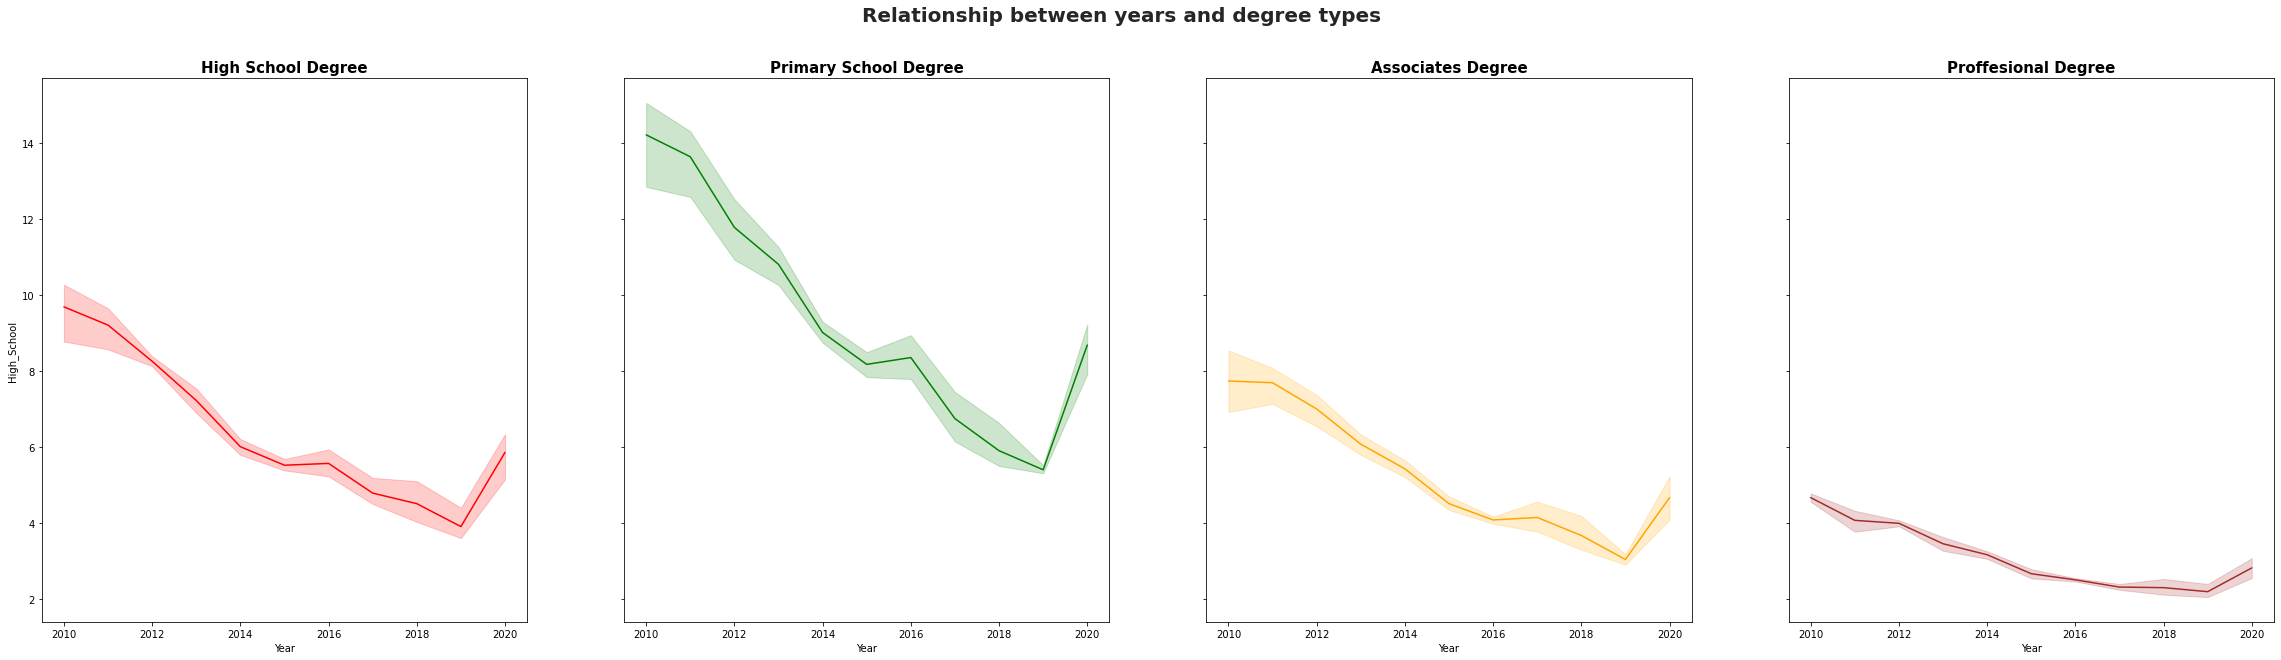

In [19]:
fig, axes=plt.subplots(1,4,sharey=True,figsize=(40,10))
sns.set_theme(style="whitegrid")
plt.suptitle("Relationship between years and degree types",fontsize=20,fontweight="bold")
ax0= sns.lineplot(ax=axes[0],data=table_filtered,x=table_filtered["Year"],y=table_filtered["High_School"],color="red")
ax0.set_title("High School Degree",fontsize=15,fontweight="bold")
ax1= sns.lineplot(ax=axes[1],data=table_filtered,x=table_filtered["Year"],y=table_filtered["Primary_School"],color="green")
ax1.set_title("Primary School Degree",fontsize=15,fontweight="bold")
ax2= sns.lineplot(ax=axes[2],data=table_filtered,x=table_filtered["Year"],y=table_filtered["Associates_Degree"],color="orange")
ax2.set_title("Associates Degree",fontsize=15,fontweight="bold")
ax3=sns.lineplot(ax=axes[3],data=table_filtered,x=table_filtered["Year"],y=table_filtered["Professional_Degree"],color="brown")
ax3.set_title("Proffesional Degree",fontsize=15,fontweight="bold")

Text(0.5, 1.0, 'Black')

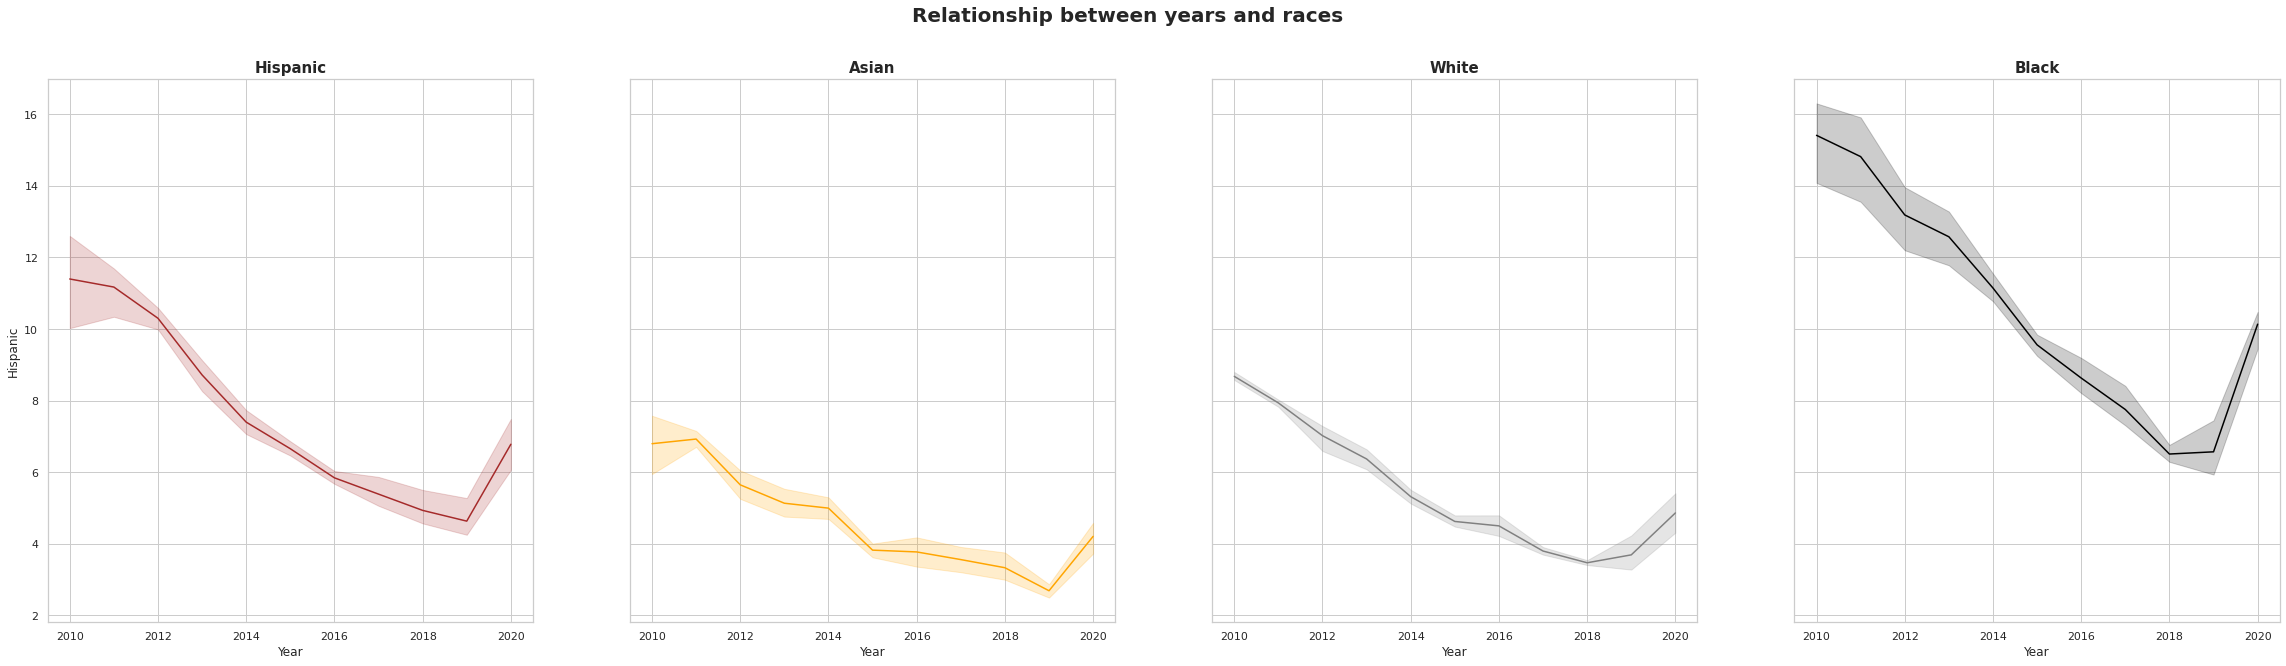

In [20]:
fig, axes=plt.subplots(1,4,sharey=True,figsize=(40,10))
sns.set_theme(style="whitegrid")
plt.suptitle("Relationship between years and races",fontsize=20,fontweight="bold")
ax0= sns.lineplot(ax=axes[0],data=table_filtered,x=table_filtered["Year"],y=table_filtered["Hispanic"],color="brown")
ax0.set_title("Hispanic",fontsize=15,fontweight="bold")
ax1= sns.lineplot(ax=axes[1],data=table_filtered,x=table_filtered["Year"],y=table_filtered["Asian"],color="orange")
ax1.set_title("Asian",fontsize=15,fontweight="bold")
ax2= sns.lineplot(ax=axes[2],data=table_filtered,x=table_filtered["Year"],y=table_filtered["White"],color="grey")
ax2.set_title("White",fontsize=15,fontweight="bold")
ax3=sns.lineplot(ax=axes[3],data=table_filtered,x=table_filtered["Year"],y=table_filtered["Black"],color="black")
ax3.set_title("Black",fontsize=15,fontweight="bold")

Text(0.5, 1.0, 'Women rate')

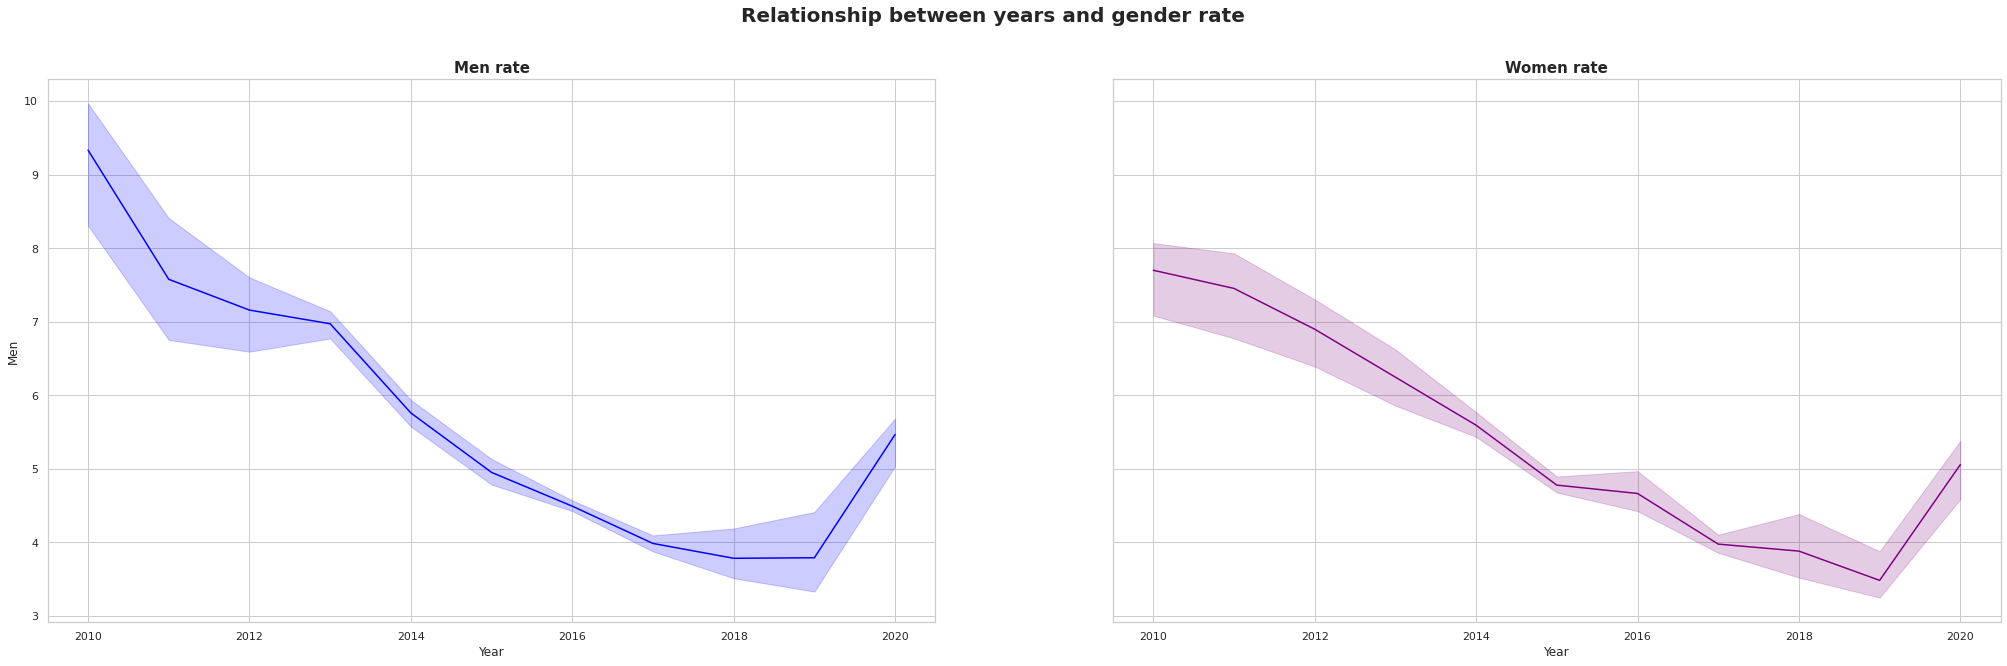

In [21]:
fig, axes=plt.subplots(1,2,sharey=True,figsize=(35,10))
sns.set_theme(style="whitegrid")
plt.suptitle("Relationship between years and gender rate",fontsize=20,fontweight="bold")
ax0= sns.lineplot(ax=axes[0],data=table_filtered,x=table_filtered["Year"],y=table_filtered["Men"],color="blue")
ax0.set_title("Men rate",fontsize=15,fontweight="bold")
ax1= sns.lineplot(ax=axes[1],data=table_filtered,x=table_filtered["Year"],y=table_filtered["Women"],color="purple")
ax1.set_title("Women rate",fontsize=15,fontweight="bold")

Text(0.5, 1.0, 'The mean value of where people graduated from Professional')

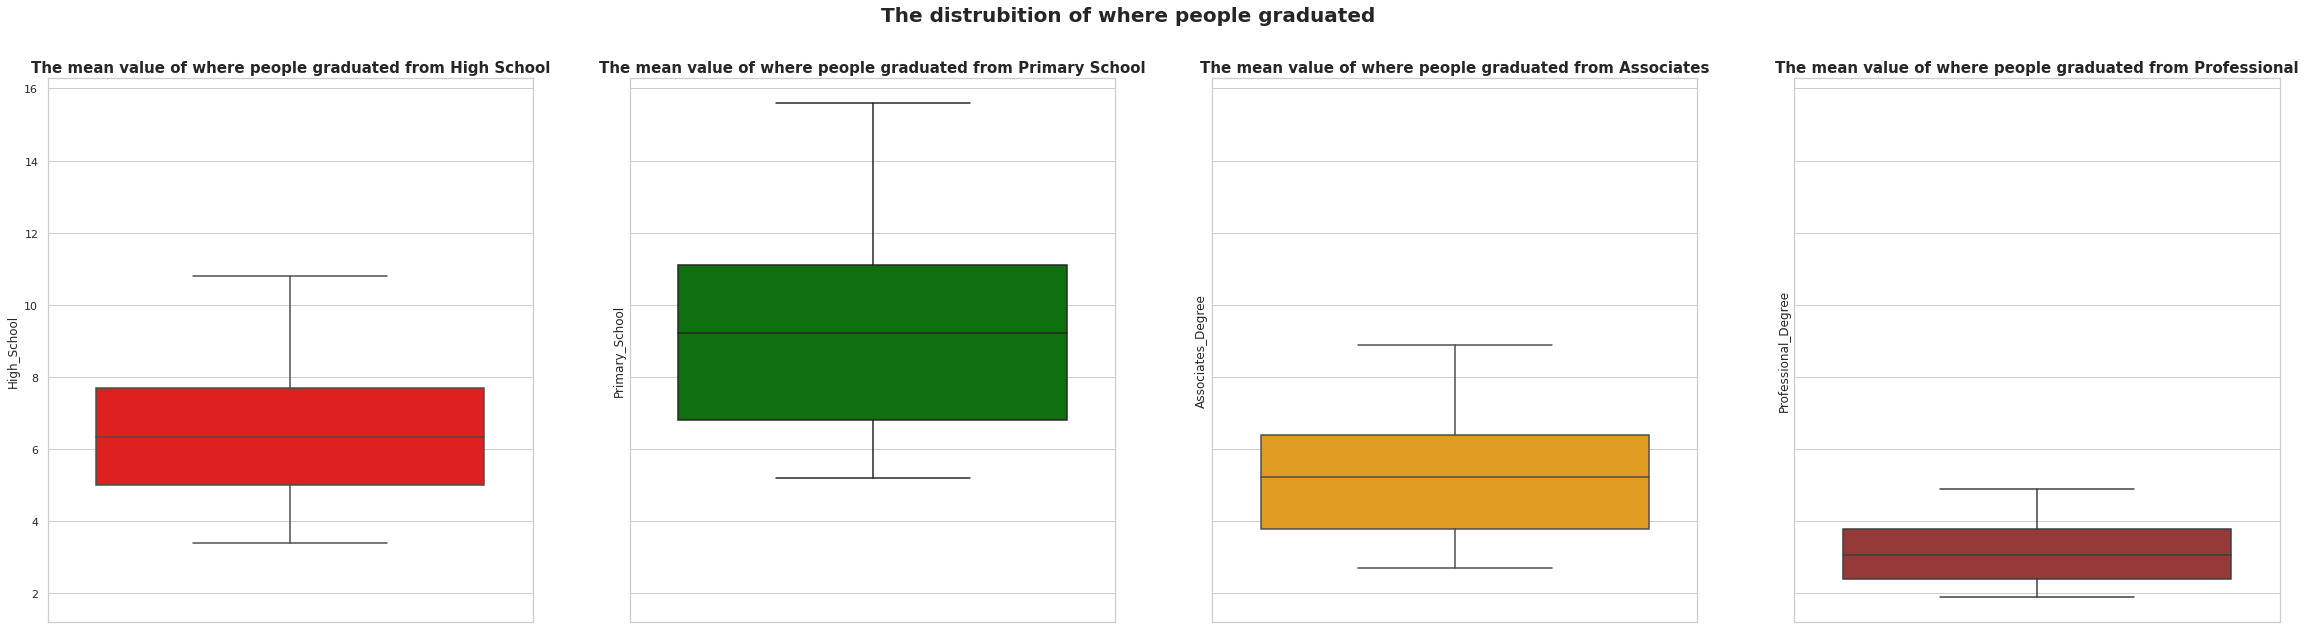

In [22]:
fig, axes=plt.subplots(1,4,sharey=True,figsize=(40,10))
sns.set_theme(style="whitegrid")
plt.suptitle("The distrubition of where people graduated",fontsize=20,fontweight="bold")
ax0=sns.boxplot(data=table_filtered,y=table_filtered["High_School"],color="red",ax=axes[0])
ax0.set_title("The mean value of where people graduated from High School",fontsize=15,fontweight="bold")
ax1=sns.boxplot(data=table_filtered,y=table_filtered["Primary_School"],color="green",ax=axes[1])
ax1.set_title("The mean value of where people graduated from Primary School",fontsize=15,fontweight="bold")
ax2=sns.boxplot(data=table_filtered,y=table_filtered["Associates_Degree"],color="orange",ax=axes[2])
ax2.set_title("The mean value of where people graduated from Associates",fontsize=15,fontweight="bold")
ax3=sns.boxplot(data=table_filtered,y=table_filtered["Professional_Degree"],color="brown",ax=axes[3])
ax3.set_title("The mean value of where people graduated from Professional",fontsize=15,fontweight="bold")

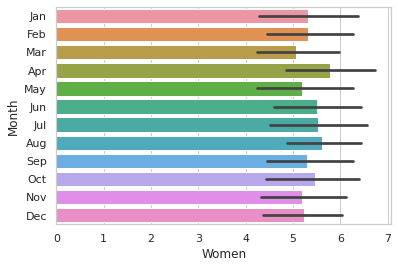

In [30]:
sns.barplot(data=table_filtered,y=table_filtered["Month"],x=table_filtered["Women"])
sns.color_palette="bright"

In [42]:
table_filtered_jan=table_filtered["Month"].loc[table["Month"]!="Jan"]

Text(0.5, 1.0, 'February')

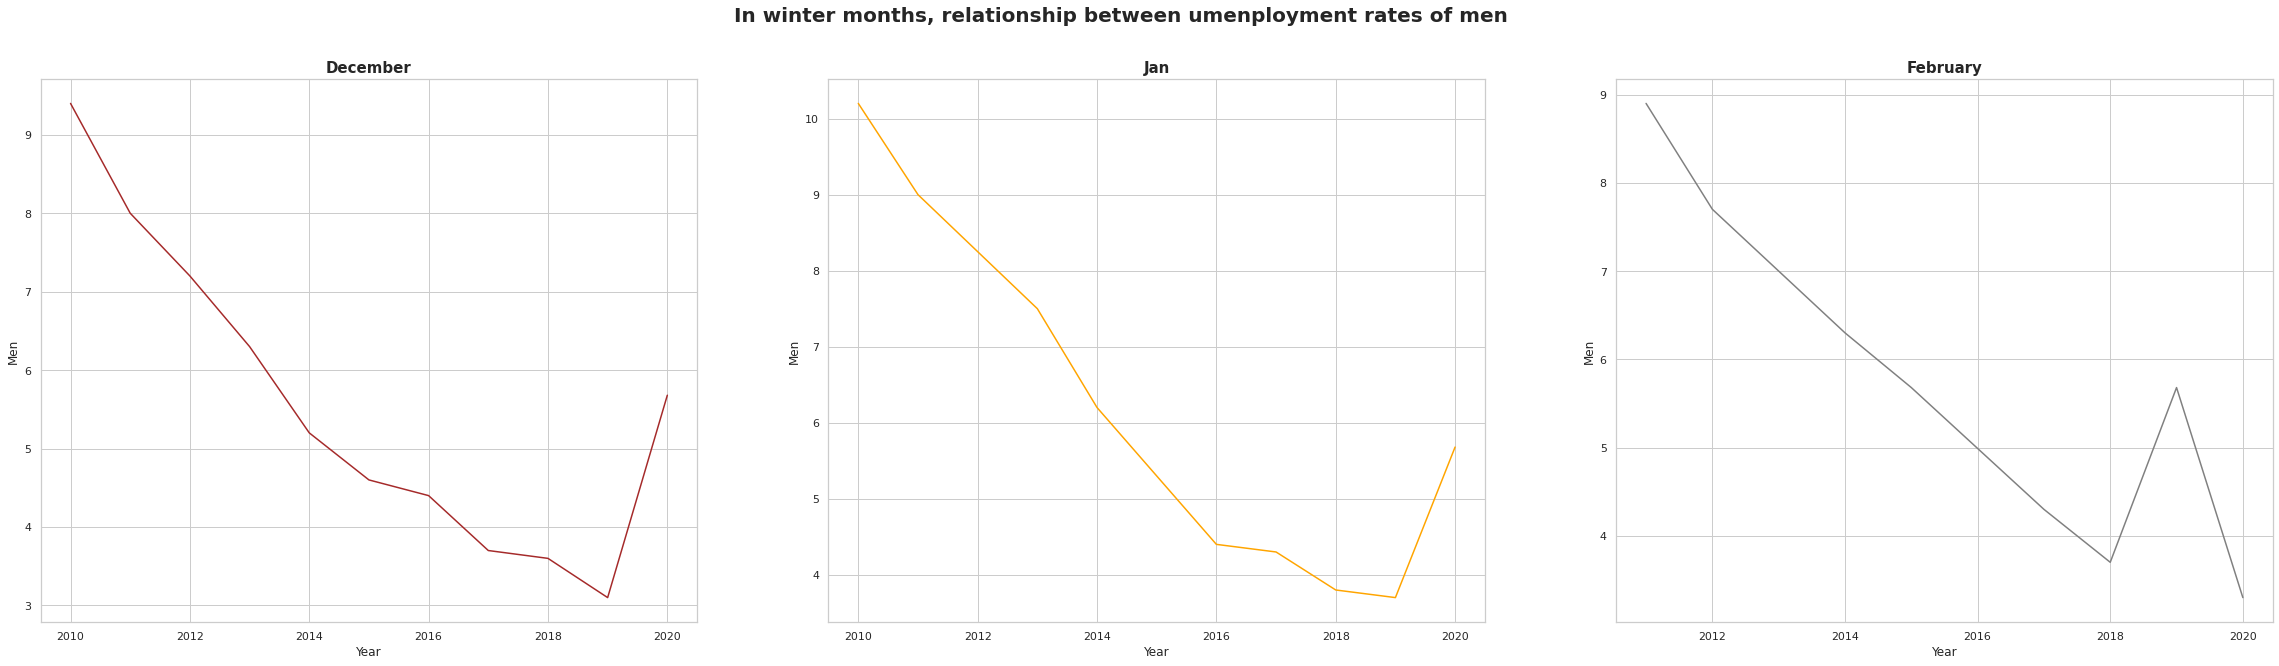

In [48]:
fig, axes=plt.subplots(1,3,figsize=(40,10))
sns.set_theme(style="whitegrid")
plt.suptitle("In winter months, relationship between umenployment rates of men",fontsize=20,fontweight="bold")
ax0= sns.lineplot(ax=axes[0],data=table_filtered["Month"],x=table_filtered["Year"].loc[table_filtered["Month"]=="Dec"],y=table_filtered["Men"].loc[table_filtered["Month"]=="Dec"],color="brown")
ax0.set_title("December",fontsize=15,fontweight="bold")
ax1= sns.lineplot(ax=axes[1],data=table_filtered,x=table_filtered["Year"].loc[table_filtered["Month"]=="Jan"],y=table_filtered["Men"].loc[table_filtered["Month"]=="Jan"],color="orange")
ax1.set_title("Jan",fontsize=15,fontweight="bold")
ax2= sns.lineplot(ax=axes[2],data=table_filtered["Month"],x=table_filtered["Year"].loc[table_filtered["Month"]=="Feb"],y=table_filtered["Men"].loc[table_filtered["Month"]=="Feb"],color="grey")
ax2.set_title("February",fontsize=15,fontweight="bold")